In [1]:
import pandas as pd
import numpy as np

## load files from data folder 

In [2]:
log = pd.read_csv(r"C:\Users\s.goodroe\Dropbox\PhD\Teaching\exampleproject\data\log.csv")
response = pd.read_csv(r"C:\Users\s.goodroe\Dropbox\PhD\Teaching\exampleproject\data\response.csv")
correct = pd.read_csv(r"C:\Users\s.goodroe\Dropbox\PhD\Teaching\exampleproject\data\correct.csv")

## create copy of response data and add metrics from the log file you want to use

In [3]:
data = response

In [4]:
data['female'] = log.gender
data['age'] = log.age
data['exp'] = log.experience
data['native'] = log.native_speaker 

In [5]:
log

,ppid,date,time,age,gender,native_speaker,experience
0,P_01,30/01/2020,10:20,18,m,y,24
1,P_02,30/01/2020,10:40,20,f,y,36
2,P_03,30/01/2020,11:00,21,f,y,20
3,P_04,30/01/2020,11:20,21,m,y,14
4,P_05,30/01/2020,11:40,29,m,y,10
5,P_06,30/01/2020,12:40,21,m,n,40
6,P_07,30/01/2020,13:40,20,f,y,19
7,P_08,30/01/2020,14:40,22,f,y,20
8,P_09,30/01/2020,15:40,24,m,n,26
9,P_10,31/01/2020,16:40,25,f,y,15


## replace non-numeric values with coded values (i.e. F = 1, Y = 1)

In [6]:
data = data.replace({'m':0,'f':1, 'y':1, 'n':0})

In [7]:
data #view dataset

,ppid,RQ,ES,CG,TS,HP,RP,LS,CT,SP,female,age,exp,native
0,P_01,289,105,112,315,119,219,190,26,218,0,18,24,1
1,P_02,33,250,143,358,298,137,215,81,10,1,20,36,1
2,P_03,266,299,6,20,146,233,182,81,348,1,21,20,1
3,P_04,26,105,302,86,165,160,280,78,103,0,21,14,1
4,P_05,94,52,67,173,296,300,277,65,320,0,29,10,1
5,P_06,151,143,115,274,157,197,233,287,248,0,21,40,0
6,P_07,241,17,330,252,79,169,214,225,180,1,20,19,1
7,P_08,336,177,60,178,59,74,199,222,103,1,22,20,1
8,P_09,351,159,156,171,168,217,112,5,253,0,24,26,0
9,P_10,104,165,143,201,336,319,264,0,6,1,25,15,1


## create output frame where you can log values such as stats you want

In [8]:
output = pd.DataFrame(columns = ['mean','sd'])

In [9]:
output['mean'] = data.mean()
output['sd'] = data.std()

In [10]:
output

,mean,sd
RQ,189.1,122.512993
ES,147.2,84.688711
CG,143.4,101.978429
TS,202.8,102.057500
HP,182.3,95.615027
RP,202.5,73.221506
LS,216.6,50.933944
CT,107.0,101.061038
SP,178.9,120.297271
female,0.5,0.527046


## how do you want to measure things such as accuracy / deviation from correct angle? 

In [11]:
deviation = pd.DataFrame(columns = data.columns[0:10])
deviation['ppid'] = data.ppid

In [12]:
def get_dev(ppid,location):
    a = correct[location]
    resp = data[location].where(data.ppid == ppid).dropna()
    dev = resp.values - a
    return dev.values[0]

In [13]:
for i in range(len(data.ppid)):
    for location in correct.columns:
        deviation['ppid'][i] = data['ppid'][i] 
        deviation[location][i] = get_dev(data.ppid[i],location)

In [14]:
deviation['av_dev'] = deviation.iloc[:,1:].mean(axis = 1)
deviation['sd_dev'] = deviation.iloc[:,1:].std(axis = 1)

In [15]:
deviation

,ppid,RQ,ES,CG,TS,HP,RP,LS,CT,SP,av_dev,sd_dev
0,P_01,230,-12,-196,-14,42,48,68,-177,20,1.000000,121.137204
1,P_02,-26,133,-165,29,221,-34,93,-122,-188,-6.555556,131.198841
2,P_03,207,182,-302,-309,69,62,60,-122,150,-0.333333,186.263255
3,P_04,-33,-12,-6,-243,88,-11,158,-125,-95,-31.000000,110.125181
4,P_05,35,-65,-241,-156,219,129,155,-138,122,6.666667,152.760524
5,P_06,92,26,-193,-55,80,26,111,84,50,24.555556,90.024825
6,P_07,182,-100,22,-77,2,-2,92,22,-18,13.666667,79.677126
7,P_08,277,60,-248,-151,-18,-97,77,19,-95,-19.555556,143.851861
8,P_09,292,42,-152,-158,91,46,-10,-198,55,0.888889,144.458717
9,P_10,45,48,-165,-128,259,148,142,-203,-192,-5.111111,161.563503


## add the mean deviation and sd for each location to your output

In [16]:
output['dev_mean'] = deviation.iloc[:,1:].mean(axis = 0)
output['dev_sd'] = deviation.iloc[:,1:].std(axis = 0)

In [17]:
output

,mean,sd,dev_mean,dev_sd
RQ,189.1,122.512993,130.1,122.512993
ES,147.2,84.688711,30.2,84.688711
CG,143.4,101.978429,-164.6,101.978429
TS,202.8,102.057500,-126.2,102.057500
HP,182.3,95.615027,105.3,95.615027
RP,202.5,73.221506,31.5,73.221506
LS,216.6,50.933944,94.6,50.933944
CT,107.0,101.061038,-96.0,101.061038
SP,178.9,120.297271,-19.1,120.297271
female,0.5,0.527046,NaN,NaN


## look at potential trends by eye

In [18]:
import matplotlib.pyplot as plt

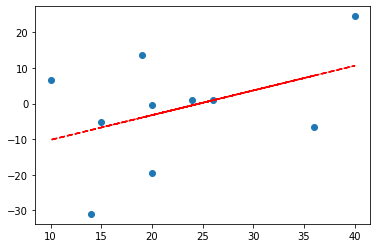

In [19]:
x = data.exp
y = deviation.av_dev

fig = plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

## fit linear regression with n predictors 

In [20]:
import statsmodels.api as sm

In [21]:
x = data[['exp','age','female']]
y = deviation.av_dev

model = sm.OLS(y,x).fit()
predictions = model.predict(x)
x = sm.add_constant(x,has_constant = 'add')

model.summary()

C:\Users\s.goodroe\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\s.goodroe\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 av_dev   R-squared (uncentered):                   0.145
Model:                            OLS   Adj. R-squared (uncentered):             -0.222
Method:                 Least Squares   F-statistic:                             0.3948
Date:                Sun, 02 Feb 2020   Prob (F-statistic):                       0.761
Time:                        16:00:37   Log-Likelihood:                         -40.485
No. Observations:                  10   AIC:                                      86.97
Df Residuals:                       7   BIC:                                      87.88
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
exp            0.4741      0.487      0.973      0.363      -0.678       1.626
age           -0.4149      0.554     -0.749      0.478      -1.724       0.895
female        -5.0465     10.222     -0.494      0.637     -29.218      19.125
==============================================================================
Omnibus:                        0.935   Durbin-Watson:                   2.325
Prob(Omnibus):                  0.627   Jarque-Bera (JB):                0.582
Skew:                          -0.530   Prob(JB):                        0.747
Kurtosis:                       2.477   Cond. No.                         62.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""